### CARGA DE LIBRERIAS A UTILIZAR EN EL PROYECTO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb



### CARGA DE LOS DATOS PARA MODELAR DESDE ARCHIVO CSV

In [ ]:
df = pd.read_csv('E-Commerce_train.csv', sep = ';')

In [ ]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [ ]:
#Se renombra la columna a predecir como 'Target'
df.rename(columns={'Reached.on.Time_Y.N':'Target'},
               inplace=True)


In [ ]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [ ]:
df.info() #se observa la información general acerca del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Target               8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [ ]:
df.shape

(8999, 12)

In [ ]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Target


#### No se observan archivos nulos ni duplicados en Dataframe

##Se observa frecuencia de cada clase en las columnas categóricas

In [ ]:
df.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [ ]:
df.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [ ]:
df.Customer_care_calls.value_counts()

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [ ]:
df.Customer_rating.value_counts()

3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [ ]:
df.Prior_purchases.value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [ ]:
df.Product_importance.value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [ ]:
df.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [ ]:
df.Target.value_counts()

1    5719
0    3280
Name: Target, dtype: int64

##Se concluye que la Data NO presenta problemas de balance en variable a predecir y se decide seguir trabajando tal como está

### Observación gráfica de algunas variables categóricas

In [ ]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

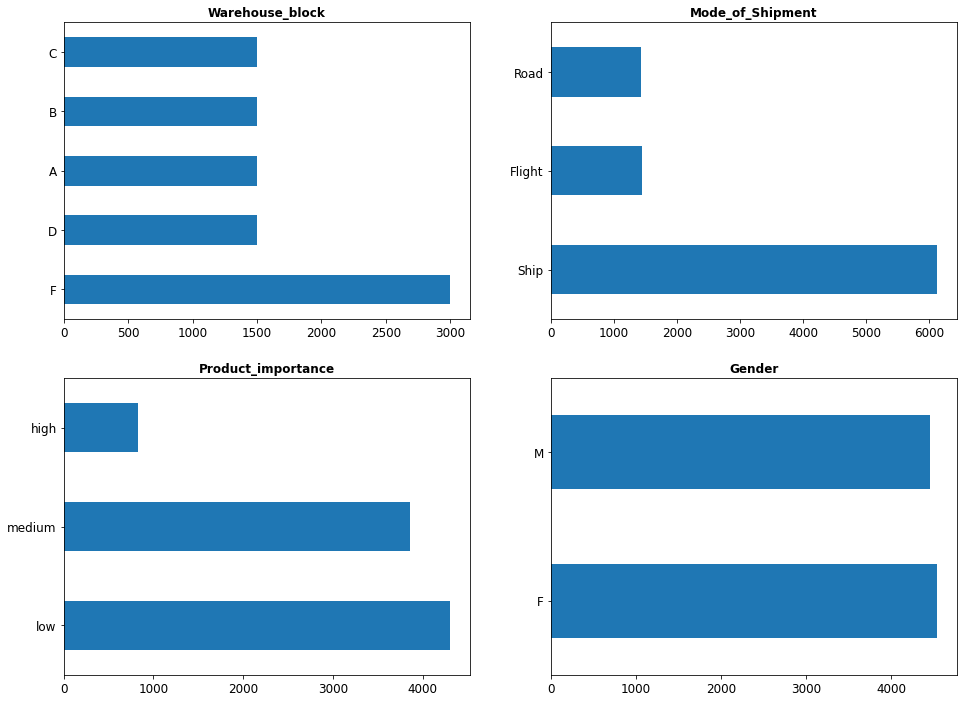

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

##Observamos cantidades de 1 y 0 en categorias de variables Gender y Warehouse_block

In [ ]:
df. groupby (['Gender', 'Target']).count()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
Gender Target                                                                 
F      0       1661             1661              1661                 1661   
       1       2879             2879              2879                 2879   
M      0       1619             1619              1619                 1619   
       1       2840             2840              2840                 2840   

               Customer_rating  Cost_of_the_Product  Prior_purchases  \
Gender Target                                                          
F      0                  1661                 1661             1661   
       1                  2879                 2879             2879   
M      0                  1619                 1619             1619   
       1                  2840                 2840             2840   

               Product_importance  Discount_offered  Weight_in_gms  
Gender Target                                                       
F      0                     1661              1661           1661  
       1                     2879              2879           2879  
M      0                     1619              1619           1619  
       1                     2840              2840           2840

In [ ]:
df. groupby (['Warehouse_block', 'Target']).count()

ID  Mode_of_Shipment  Customer_care_calls  \
Warehouse_block Target                                                
A               0        561               561                  561   
                1        939               939                  939   
B               0        536               536                  536   
                1        964               964                  964   
C               0        547               547                  547   
                1        953               953                  953   
D               0        541               541                  541   
                1        959               959                  959   
F               0       1095              1095                 1095   
                1       1904              1904                 1904   

                        Customer_rating  Cost_of_the_Product  Prior_purchases  \
Warehouse_block Target                                                          
A               0                   561                  561              561   
                1                   939                  939              939   
B               0                   536                  536              536   
                1                   964                  964              964   
C               0                   547                  547              547   
                1                   953                  953              953   
D               0                   541                  541              541   
                1                   959                  959              959   
F               0                  1095                 1095             1095   
                1                  1904                 1904             1904   

                        Product_importance  Gender  Discount_offered  \
Warehouse_block Target                                                 
A               0                      561     561               561   
                1                      939     939               939   
B               0                      536     536               536   
                1                      964     964               964   
C               0                      547     547               547   
                1                      953     953               953   
D               0                      541     541               541   
                1                      959     959               959   
F               0                     1095    1095              1095   
                1                     1904    1904              1904   

                        Weight_in_gms  
Warehouse_block Target                 
A               0                 561  
                1                 939  
B               0                 536  
                1                 964  
C               0                 547  
                1                 953  
D               0                 541  
                1                 959  
F               0                1095  
                1                1904

##Se observan proporciones similares de 1 y 0 en las distintas categorías de las variables, por lo que no aportan demasiada información para el modelo y se eliminan

In [ ]:
df=df.drop(['Gender'], axis=1)

In [ ]:
df=df.drop(['Warehouse_block'], axis=1)

In [ ]:
df.head(30)

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,1,Flight,4,2,177,3,low,44,1233,1
1,2,Flight,4,5,216,2,low,59,3088,1
2,3,Flight,2,2,183,4,low,48,3374,1
3,4,Flight,3,3,176,4,medium,10,1177,1
4,5,Flight,2,2,184,3,medium,46,2484,1
5,6,Flight,3,1,162,3,medium,12,1417,1
6,7,Flight,3,4,250,3,low,3,2371,1
7,8,Flight,4,1,233,2,low,48,2804,1
8,9,Flight,3,4,150,3,low,11,1861,1
9,10,Flight,3,2,164,3,medium,29,1187,1


## Observacion estadistica de variables numericas

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,8999.0,4500.000000,4500.0,2597.931870,1.0,2250.5,4500.0,6749.5,8999.0
Customer_care_calls,8999.0,4.015113,4.0,1.138934,2.0,3.0,4.0,5.0,7.0
Customer_rating,8999.0,2.994999,3.0,1.413143,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8999.0,208.561507,211.0,48.289172,96.0,168.0,211.0,249.5,310.0
Prior_purchases,8999.0,3.511501,3.0,1.532074,2.0,3.0,3.0,4.0,10.0
Discount_offered,8999.0,15.097678,8.0,17.400040,1.0,4.0,8.0,19.0,65.0
Weight_in_gms,8999.0,3584.364596,4046.0,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0
Target,8999.0,0.635515,1.0,0.481312,0.0,0.0,1.0,1.0,1.0


Conclusiones:

* Variable Discount_offered presenta valores muy dispares entre la media y la mediana



In [ ]:
df2=df.drop('ID', axis=1) #Se elimina del DataFrame columna ID
df2.head(3)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,Flight,4,2,177,3,low,44,1233,1
1,Flight,4,5,216,2,low,59,3088,1
2,Flight,2,2,183,4,low,48,3374,1


In [ ]:
df2.corr() # Se observa correlación de variable a predecir con las otras variables numéricas, para determinar importancia.

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target
Customer_care_calls,1.000000,0.012131,0.318109,0.164541,-0.128805,-0.237731,-0.072261
Customer_rating,0.012131,1.000000,0.009818,0.015606,-0.004315,-0.000227,0.011045
Cost_of_the_Product,0.318109,0.009818,1.000000,0.100637,-0.138259,-0.057113,-0.083470
Prior_purchases,0.164541,0.015606,0.100637,1.000000,-0.072634,-0.113060,-0.048269
Discount_offered,-0.128805,-0.004315,-0.138259,-0.072634,1.000000,-0.417782,0.416357
Weight_in_gms,-0.237731,-0.000227,-0.057113,-0.113060,-0.417782,1.000000,-0.326877
Target,-0.072261,0.011045,-0.083470,-0.048269,0.416357,-0.326877,1.000000


Variable Discount_offered presenta la correlación positiva más alta y variable Weight_in_gms presenta correlación negativa más alta, por lo que ambas serían de las más importantes para utilizar en el modelo que se implementará.

---



##Se utiliza One Hot Encoder para cambiar variables categóricas a numéricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

data_encoded = df2[['Customer_care_calls']]   #se toma variable Customer_care_calls
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())

In [ ]:
data_encoded.head(3)

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
de1=data_encoded.rename({0: 'Dos', 1: 'Tres', 2: 'Cuatro', 3: 'Cinco', 4: 'Seis', 5: 'Siete'}, axis=1) #se renombran nuevas columnas

In [ ]:
de1.head(3)

,Dos,Tres,Cuatro,Cinco,Seis,Siete
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Incorporamos el dataframe codificado al dataframe original

df3 = df2.join(de1)

In [ ]:
df3.head(3)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete
0,Flight,4,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0
1,Flight,4,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0
2,Flight,2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3=df3.drop('Customer_care_calls', axis=1) #Se elimina columna correspondiente

In [ ]:
data_encoded2 = df3[['Mode_of_Shipment']] # Se toma variable 'Mode_of_Shipment'
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded2 = pd.DataFrame(ohe.fit_transform(data_encoded2).toarray())

In [ ]:
data_encoded2.head(3)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [ ]:
de2=data_encoded2.rename({0: 'Flight', 1: 'Road', 2: 'Ship'}, axis=1)

In [ ]:
de2.head(3)

,Flight,Road,Ship
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [ ]:
# Incorporamos el dataframe codificado al dataframe original

df4 = df3.join(de2)

In [ ]:
df4.head(3)

,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship
0,Flight,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Flight,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Flight,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df4=df4.drop('Mode_of_Shipment', axis=1) #se elimina columna correspondiente

In [ ]:
df4.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship
0,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data_encoded3 = df4[['Product_importance']] #se toma variable 'Product_importance'
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded3 = pd.DataFrame(ohe.fit_transform(data_encoded3).toarray())

In [ ]:
data_encoded3.head(3)

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0


In [ ]:
de3=data_encoded3.rename({0: 'High', 1: 'Low', 2: 'Medium'}, axis=1)

In [ ]:
de3.head(3)

,High,Low,Medium
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0


In [ ]:
# Incorporamos el dataframe codificado al dataframe original

df5 = df4.join(de3)

In [ ]:
df5.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship,High,Low,Medium
0,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df5=df5.drop('Product_importance', axis=1) #se elimina columna correspondiente

In [ ]:
df5.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship,High,Low,Medium
0,2,177,3,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,216,2,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,183,4,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_encoded4 = df5[['Prior_purchases']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded4 = pd.DataFrame(ohe.fit_transform(data_encoded4).toarray())

In [ ]:
data_encoded4.head(3)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
de4=data_encoded4.rename({0: '2cp', 1: '3cp', 2: '4cp', 3: '5cp', 4: '6cp', 5: '7cp', 6: '8cp', 7: '9cp'}, axis=1)

In [ ]:
de4.head(3)

,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Incorporamos el dataframe codificado al dataframe original

df6 = df5.join(de4)

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,2,177,3,44,1233,1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,216,2,59,3088,1,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,183,4,48,3374,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df6=df6.drop('Prior_purchases', axis=1) #se elimina columna correspondiente

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,2,177,44,1233,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,216,59,3088,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,183,48,3374,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#ordenamiento de columnas
df6 = df6[['Customer_rating','Cost_of_the_Product','Discount_offered','Weight_in_gms', 'Dos','Tres','Cuatro','Cinco','Seis','Siete', 'Flight','Road','Ship','High', 'Low','Medium', '2cp', '3cp', '4cp', '5cp', '6cp', '7cp', '8cp', '9cp','Target']]

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,177,44,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,216,59,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,183,48,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df6.shape

(8999, 25)

In [ ]:
df6.corr()

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
Customer_rating,1.000000,0.009818,-0.004315,-0.000227,0.003524,-0.018157,0.013549,-0.011531,0.019866,0.001067,...,0.011487,-0.012152,0.001259,0.005911,-0.002319,0.007237,-0.010287,0.003864,0.017551,0.011045
Cost_of_the_Product,0.009818,1.000000,-0.138259,-0.057113,-0.112320,-0.138013,-0.056197,0.046156,0.240210,0.208584,...,-0.018597,-0.081744,-0.144023,0.196268,0.093759,0.020256,-0.002443,-0.019305,-0.016097,-0.083470
Discount_offered,-0.004315,-0.138259,1.000000,-0.417782,0.048570,0.068748,0.001005,-0.014704,-0.097734,-0.070261,...,0.009255,0.059910,0.068755,-0.086845,-0.075597,-0.021248,0.023302,-0.006935,-0.000339,0.416357
Weight_in_gms,-0.000227,-0.057113,-0.417782,1.000000,-0.003158,0.121035,0.093114,-0.018079,-0.225391,-0.188757,...,0.042223,0.105675,0.141968,-0.155842,-0.199752,-0.031965,0.028767,0.035239,0.042202,-0.326877
Dos,0.003524,-0.112320,0.048570,-0.003158,1.000000,-0.169598,-0.176255,-0.128961,-0.080170,-0.037311,...,-0.021026,-0.011590,0.042998,-0.030191,-0.011192,0.007278,-0.006913,0.002990,-0.012046,0.027785
Tres,-0.018157,-0.138013,0.068748,0.121035,-0.169598,1.000000,-0.455669,-0.333402,-0.207263,-0.096460,...,0.032212,0.111971,0.094296,-0.117682,-0.147612,-0.055546,-0.000835,0.017045,0.044339,0.037007
Cuatro,0.013549,-0.056197,0.001005,0.093114,-0.176255,-0.455669,1.000000,-0.346489,-0.215398,-0.100246,...,0.001519,0.044283,0.060742,-0.109395,-0.027752,-0.000219,0.015204,0.000164,0.009513,0.001034
Cinco,-0.011531,0.046156,-0.014704,-0.018079,-0.128961,-0.333402,-0.346489,1.000000,-0.157602,-0.073348,...,0.000414,-0.038924,-0.040018,-0.041455,0.162036,0.050484,0.001218,-0.009399,-0.035941,0.000208
Seis,0.019866,0.240210,-0.097734,-0.225391,-0.080170,-0.207263,-0.215398,-0.157602,1.000000,-0.045597,...,-0.029346,-0.146779,-0.178770,0.337333,0.050295,0.028546,-0.010760,-0.008667,-0.016829,-0.073150
Siete,0.001067,0.208584,-0.070261,-0.188757,-0.037311,-0.096460,-0.100246,-0.073348,-0.045597,1.000000,...,-0.016008,-0.083837,-0.105654,0.231352,0.029278,-0.031501,-0.017359,-0.016792,-0.019094,-0.024022


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

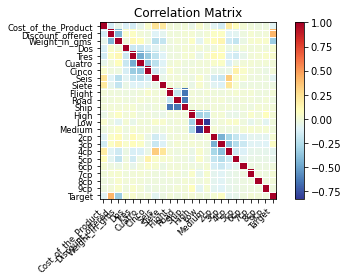

In [ ]:
corr = df6.set_index('Customer_rating').corr() #Se observa correlación de todas las columnas
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

##Se procede a estandarizar/normalizar columnas numericas, ya que los ordenes de magnitud son bastante diferentes y pueden influir en los resultados

In [ ]:
from sklearn.preprocessing import StandardScaler

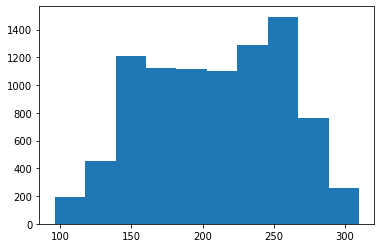

In [ ]:
# Trabajaremos con la variable Cost_of_the_Product. Veamos su distribución

plt.hist(df6['Cost_of_the_Product']) 
plt.show()

In [ ]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Cost_of_the_Product']])

df6['Cost_of_the_Product'] = scaler.transform(df6[['Cost_of_the_Product']])

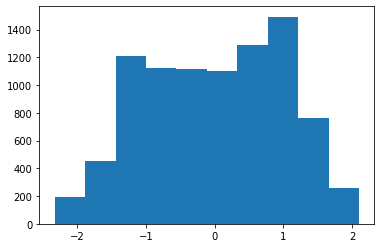

In [ ]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Cost_of_the_Product']) 
plt.show()

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,44,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,59,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,48,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


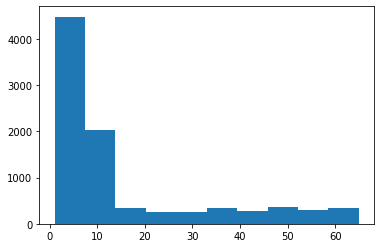

In [ ]:
# Trabajaremos con la variable Discount_offered. Veamos su distribución

plt.hist(df6['Discount_offered']) 
plt.show()

In [ ]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Discount_offered']])

df6['Discount_offered'] = scaler.transform(df6[['Discount_offered']])

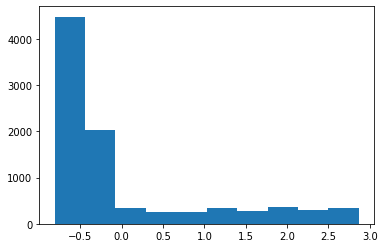

In [ ]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Discount_offered']) 
plt.show()

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


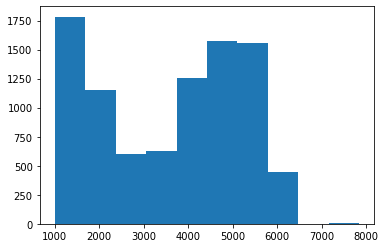

In [ ]:
# Trabajaremos con la variable Weight_in_gms. Veamos su distribución

plt.hist(df6['Weight_in_gms']) 
plt.show()

In [ ]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Weight_in_gms']])

df6['Weight_in_gms'] = scaler.transform(df6[['Weight_in_gms']])

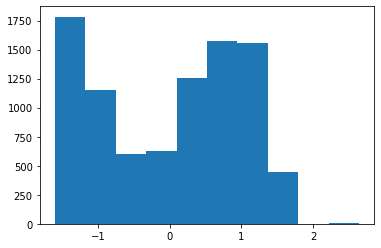

In [ ]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Weight_in_gms']) 
plt.show()

In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


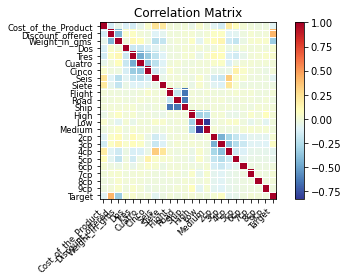

In [ ]:
corr = df6.set_index('Customer_rating').corr() #nueva comprobacion de correlacion de variables
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### DISEÑO DE LA MODELIZACIÓN

##Como estamos ante un problema de clasificación, utilizaremos un modelo de los más sencillos como la regresión logística y según los resultados abordaremos algún otro modelo más complejo.

#### Separación de variables predictoras y target

In [ ]:
df6.head(4)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,3,-0.674340,-0.292986,-1.490942,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
x = df6.drop(['Target'], axis=1)
y = df6['Target']

#### Separación de data para train y test

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=10) 

In [ ]:
train_x.shape

(6299, 24)

### ENTRENAMIENTO DEL MODELO SOBRE DATA DE TRAIN

In [ ]:
#Definicion del modelo a utilizar
model = linear_model.LogisticRegression()


#Entrenamiento del modelo
model.fit(train_x,train_y)

LogisticRegression()

### PREDICCIÓN Y VALIDACIÓN SOBRE DATOS DE TEST ARCHIVO TRAIN

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Evaluación 2
from sklearn.metrics import recall_score

#recall_score(yt,yp, average='macro')
recall_score(test_y,y_pred)

0.7511792452830188

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1004
           1       0.74      0.75      0.74      1696

    accuracy                           0.68      2700
   macro avg       0.65      0.65      0.65      2700
weighted avg       0.67      0.68      0.68      2700



### PREDICCIÓN SOBRE DATOS DE ARCHIVO TEST 

In [ ]:
df10 = pd.read_csv('test1 (1).csv', sep = ',')

In [ ]:
df10.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,1,-0.616410,1.510350,0.814459,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,-1.458294,1.165993,0.344728,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.378956,-0.900149,1.102038,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_artest = df10

In [ ]:
x_artest

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,1,-0.616410,1.510350,0.814459,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,-1.458294,1.165993,0.344728,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.378956,-0.900149,1.102038,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-1.825269,-1.588863,0.460111,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.916250,-0.555792,0.964399,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.743556,-1.588863,-1.358489,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1996,1,0.311821,0.132922,-1.528928,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1997,4,0.527688,-0.555792,-1.582812,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1998,2,0.117540,-1.244506,-1.550599,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_artest = model.predict(x_artest)

In [ ]:
y_artest

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
arfinal=pd.DataFrame(y_artest)

In [ ]:
arfinal.value_counts()

1    1348
0     652
dtype: int64

In [ ]:
arfinal.head(3)

,0
0,1
1,1
2,0


In [ ]:
arfinal2=arfinal.rename({0: 'pred'}, axis=1)

In [ ]:
arfinal2.head(3)

,pred
0,1
1,1
2,0


In [ ]:
arfinal2.to_csv('CAAM1972.csv', index=False)